In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import torch


A Neural Network is an aspect of Artificial Intelligence that attempts to mimic the way a human brain thinks. It uses nodes, also referred to as "Preceptrons", that use linear functions of inputs. Using these Preceptrons leads to the activation function, which assists the model in analyzing complex data. 

Creating a Neural Network starts with gathering and cleaning data along with have an idea of what you are trying to achieve using Machine Learning. In addition you need to determine how to weight your train and test data. Once you have done this, you will create your network architecture and insert activation functions. You must then add your loss function most practical for the data in question. A more popular choice is cross-entropy. Lastly, you must evaluate your model and determine the impacts of different inputs. 

Two big ways of checking the performance of a neural network are cross-validation and visualizing your results. An ROC curve is an example of visualized data that you can use to interpret the results. 

In [20]:
data_df = pd.read_csv("adult.data5.csv")
data_df.head()
data_df

,age,workclass,fnlwgt,education,educationnumber,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:

data_df = pd.get_dummies(data=data_df, columns=(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']), dtype=int)     
print(data_df[[ 'fnlwgt', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Female', 'sex_ Male']])
 
print(data_df['income'])

conv_dict={'<=50K':0, '>50K':1}

       fnlwgt  race_ Black  race_ Other  race_ White  sex_ Female  sex_ Male
0       77516            0            0            1            0          1
1       83311            0            0            1            0          1
2      215646            0            0            1            0          1
3      234721            1            0            0            0          1
4      338409            1            0            0            1          0
...       ...          ...          ...          ...          ...        ...
32556  257302            0            0            1            1          0
32557  154374            0            0            1            0          1
32558  151910            0            0            1            1          0
32559  201490            0            0            1            0          1
32560  287927            0            0            1            1          0

[32561 rows x 6 columns]
0        <=50K
1        <=50K
2        <=50K
3    

In [22]:
import time
tic = time.perf_counter()

data_df['income']=data_df['income'].replace(conv_dict)
        
print(data_df['income'])
         
toc = time.perf_counter()
adultTime = toc - tic

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64


/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_49422/586483285.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['income']=data_df['income'].replace(conv_dict)


In [23]:
data_df.head(15)

,age,fnlwgt,educationnumber,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
X = data_df.drop('income',axis = 1)
y = data_df['income']

In [25]:
def cleaning(data_df):

   data_df= data_df.dropna()

   return data_df

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,
                                                    stratify=y)

In [27]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [28]:
data_df.columns = [col.lower().replace('-', '_') for col in data_df.columns]

In [29]:
X_train = torch.FloatTensor(X_train.to_numpy())
X_test = torch.FloatTensor(X_test.to_numpy())

y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [30]:
import torch.nn as nn
import torch.nn.functional as F 

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

tensor([[-0.7813,  0.4148, 10.0000,  ...,  1.0000,  0.0000,  0.0000],
        [-0.2694, -0.2203,  8.0000,  ...,  1.0000,  0.0000,  0.0000],
        [-0.6350,  0.7432,  9.0000,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 0.9005, -0.2461,  9.0000,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.7780,  0.1313,  9.0000,  ...,  1.0000,  0.0000,  0.0000],
        [-0.5619, -0.6040,  4.0000,  ...,  1.0000,  0.0000,  0.0000]])


In [31]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() 
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [32]:
torch.manual_seed(32)

ann = ANN_Model(108)

In [33]:

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(ann.parameters(), lr=0.01)

In [34]:
num_features = X_train.shape[1]
print("Number of features:", num_features)

Number of features: 108


In [35]:
final_loss = []
n_epochs = 500

for epoch in range(n_epochs):
    y_pred = ann(X_train) 
    
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss.item())
    
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')

Epoch number: 1 with loss: 0.718543291091919
Epoch number: 11 with loss: 0.5101900100708008


Epoch number: 21 with loss: 0.365822970867157
Epoch number: 31 with loss: 0.3338184058666229
Epoch number: 41 with loss: 0.32128921151161194
Epoch number: 51 with loss: 0.31584247946739197
Epoch number: 61 with loss: 0.312380313873291
Epoch number: 71 with loss: 0.3091770112514496
Epoch number: 81 with loss: 0.30597659945487976
Epoch number: 91 with loss: 0.30381524562835693
Epoch number: 101 with loss: 0.3019619286060333
Epoch number: 111 with loss: 0.30028823018074036
Epoch number: 121 with loss: 0.29873156547546387
Epoch number: 131 with loss: 0.297271728515625
Epoch number: 141 with loss: 0.2961697280406952
Epoch number: 151 with loss: 0.2945329248905182
Epoch number: 161 with loss: 0.2928905189037323
Epoch number: 171 with loss: 0.29240748286247253
Epoch number: 181 with loss: 0.29069069027900696
Epoch number: 191 with loss: 0.28875210881233215
Epoch number: 201 with loss: 0.28912457823753357
Epoch number: 211 with loss: 0.2863174378871918
Epoch number: 221 with loss: 0.2853530347

In [36]:

y_pred = []

with torch.no_grad(): 
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 
       

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7417
           1       0.72      0.61      0.66      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (9771).

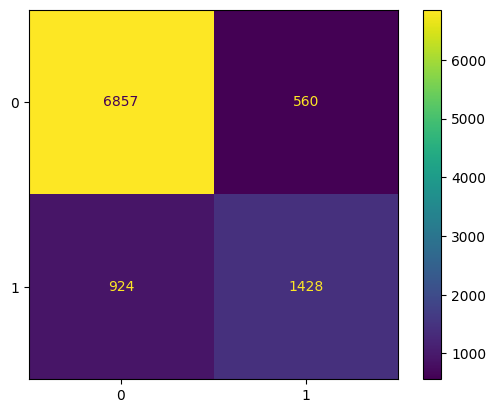

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# I think this model performed better mainly because I thought my original model performed poorly. 